# Interfaces en Programación Orientada a Objetos

Bienvenido/a. En esta lección aprenderás el concepto de interfaces, fundamentales para el diseño de sistemas modulares y extensibles en POO.

## Objetivos
- Comprender qué es una interfaz y su importancia en POO.
- Implementar interfaces en Python usando clases abstractas.
- Aplicar interfaces en ejemplos de la vida real.

---

**Ejemplo de la vida real:** Piensa en un control remoto: no te importa cómo funciona internamente, solo necesitas saber qué botones puedes presionar y qué hacen. Eso es una interfaz.

# Interfaces en Programación Orientada a Objetos

Las interfaces son un concepto fundamental en la Programación Orientada a Objetos (POO) que define un contrato para las clases. Aunque Python no tiene un soporte nativo para interfaces como otros lenguajes, se pueden simular usando clases abstractas.

# Las interfaces definen el qué y no el cómo

## ¿Qué es una interfaz?

Una interfaz es un contrato que define un conjunto de métodos que una clase debe implementar. Es decir, una interfaz define el comportamiento de un objeto sin centrarse en los detalles de cómo se implementa.

## Tipos de interfaces en Python

1. **Interfaces informales**: Se definen como una clase que no implementa los métodos.
2. **Interfaces formales**: Se definen como una clase abstracta que implementa los métodos.


## Explicación

Una interfaz:

1. Define un conjunto de métodos que una clase debe implementar.

2. Proporciona un nivel de abstracción, permitiendo tratar objetos de diferentes clases de manera uniforme.

3. Facilita el diseño de sistemas modulares y extensibles.

4. Mejora la mantenibilidad del código al establecer contratos claros entre componentes.

## Ejemplos prácticos

### Ejemplo 1: Interfaz sin ABC

En este ejemplo:

1. `InterfazAnimal` define los métodos que las clases hijas deben implementar.

2. `Perro` y `Gato` implementan los métodos de la interfaz.

3. `interactuar_con_animal` puede trabajar con cualquier objeto que implemente la interfaz.

In [1]:
class InterfazAnimal:
    def hacer_sonido(self) -> str:
        raise NotImplementedError("Subclass must implement abstract method")

    def moverse(self) -> str:
        raise NotImplementedError("Subclass must implement abstract method")

class Perro(InterfazAnimal):
    def hacer_sonido(self) -> str:
        return "Guau!"

    def moverse(self) -> str:
        return "El perro corre"

class Gato(InterfazAnimal):
    def hacer_sonido(self) -> str:
        return "Miau!"


In [2]:
def interactuar_con_animal(animal: InterfazAnimal) -> None:
    print(animal.hacer_sonido())
    print(animal.moverse())

perro: Perro = Perro()

interactuar_con_animal(animal=perro)

Guau!
El perro corre


In [3]:
gato: Gato = Gato()
interactuar_con_animal(animal=gato)

Miau!


NotImplementedError: Subclass must implement abstract method

### Ejemplo 2: Interfaz con ABC

En este ejemplo:

1. `InterfazVehiculo` usa `ABC` y `@abstractmethod` para definir una interfaz más estricta.

2. `Carro` y `Bicicleta` implementan correctamente la interfaz.

3. `VehiculoIncompleto` no implementa todos los métodos, lo que resulta en un error al instanciar.

In [ ]:
from abc import ABC, abstractmethod

class InterfazVehiculo(ABC):
    @abstractmethod
    def acelerar(self) -> str:
        pass

    @abstractmethod
    def frenar(self) -> str:
        pass

class Carro(InterfazVehiculo):
    def acelerar(self) -> str:
        return "El carro acelera"

    def frenar(self) -> str:
        return "El carro frena"

class Bicicleta(InterfazVehiculo):
    def acelerar(self) -> str:
        return "La bicicleta pedalea más rápido"

    def frenar(self) -> str:
        return "La bicicleta frena"

In [ ]:
def probar_vehiculo(vehiculo: InterfazVehiculo) -> None:
    print(vehiculo.acelerar())
    print(vehiculo.frenar())

carro: Carro = Carro()
bicicleta: Bicicleta = Bicicleta()

probar_vehiculo(vehiculo=carro)
probar_vehiculo(vehiculo=bicicleta)

El carro acelera
El carro frena
La bicicleta pedalea más rápido
La bicicleta frena


In [ ]:
# Esto causará un error
class VehiculoIncompleto(InterfazVehiculo):
    def acelerar(self) -> str:
        return "Acelerando"
    # No se implementa el método frenar()

try:
    vehiculo_incompleto = VehiculoIncompleto()
except TypeError as e:
    print(f"Error: {e}")

Error: Can't instantiate abstract class VehiculoIncompleto with abstract method frenar


In [ ]:
from abc import ABC, abstractmethod

# Interfaz
class Pago(ABC):

    @abstractmethod
    def procesar_pago(self, monto: float) -> None:
        pass


# Implementación con tarjeta
class PagoTarjeta(Pago):
    def __init__(self, numero_tarjeta: str):
        self.numero_tarjeta = numero_tarjeta

    def procesar_pago(self, monto: float) -> None:
        print(f"💳 Procesando pago de ${monto:,.2f} con tarjeta {self.numero_tarjeta[-4:]}")


# Implementación en efectivo
class PagoEfectivo(Pago):
    def procesar_pago(self, monto: float) -> None:
        print(f"💵 Pago en efectivo recibido: ${monto:,.2f}")

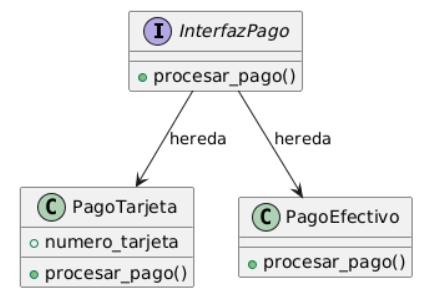

## Ejercicios prácticos y preguntas de reflexión

1. Crea una interfaz `Vehiculo` con métodos `acelerar` y `frenar`, e implementa dos clases: `Bicicleta` y `Automovil`.
2. Modifica el ejemplo de animales para agregar una clase `Pajaro` que implemente la interfaz.
3. ¿Por qué es útil definir interfaces en el desarrollo de software?

### Autoevaluación
- ¿Qué ventajas aporta el uso de interfaces?
- ¿Puedes dar un ejemplo de interfaz en tu vida diaria?

## Por qué usar interfaces

1. **Abstracción**: Permiten trabajar con conceptos de alto nivel sin preocuparse por los detalles de implementación.

2. **Polimorfismo**: Facilitan el tratamiento uniforme de objetos de diferentes clases.

3. **Diseño modular**: Ayudan a crear sistemas más flexibles y fáciles de extender.

4. **Contratos claros**: Establecen expectativas claras sobre el comportamiento de las clases.

## Conclusión

Las interfaces en Python, ya sea mediante clases abstractas simples o usando el módulo `abc`, son una herramienta poderosa en la POO:

- Proporcionan una forma de definir contratos para las clases.

- Mejoran la estructura y el diseño del código.

- Facilitan la creación de sistemas extensibles y mantenibles.

- Promueven buenas prácticas de programación como el principio de sustitución de Liskov.

Aunque Python no tiene interfaces nativas, las técnicas mostradas permiten lograr resultados similares. El uso de `ABC` y `@abstractmethod` ofrece un enfoque más robusto y cercano a las interfaces tradicionales, mientras que las interfaces sin ABC proporcionan una solución más flexible pero menos estricta.

En el desarrollo de software moderno, las interfaces son cruciales para crear sistemas bien estructurados y fáciles de mantener. Son especialmente útiles en proyectos grandes o en el desarrollo de bibliotecas y frameworks donde la claridad y la consistencia son esenciales.

## Referencias y recursos
- [Documentación oficial de Python: clases abstractas](https://docs.python.org/es/3/library/abc.html)
- [Interfaces en Python - W3Schools](https://www.w3schools.com/python/python_classes.asp)
- [Visualizador de objetos Python Tutor](https://pythontutor.com/)